<a href="https://colab.research.google.com/github/KolachalamJayaKrishna/Project1-spam/blob/main/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cats Vs Dogs

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.8MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.3MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
#dividing larger data into batches using generators
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    batch_size=32,
    image_size=(256,256)
)

validation_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#formatting the numpy format
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
#creation of model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=7,validation_data=validation_ds)

Epoch 1/7
625/625 [==============================] - 75s 113ms/step - loss: 1.2724 - accuracy: 0.5875 - val_loss: 0.6692 - val_accuracy: 0.5890
Epoch 2/7
625/625 [==============================] - 68s 108ms/step - loss: 0.5747 - accuracy: 0.7023 - val_loss: 0.5312 - val_accuracy: 0.7348
Epoch 3/7
625/625 [==============================] - 71s 113ms/step - loss: 0.4854 - accuracy: 0.7661 - val_loss: 0.4994 - val_accuracy: 0.7714
Epoch 4/7
625/625 [==============================] - 69s 110ms/step - loss: 0.4369 - accuracy: 0.7998 - val_loss: 0.5248 - val_accuracy: 0.7460
Epoch 5/7
625/625 [==============================] - 70s 112ms/step - loss: 0.3643 - accuracy: 0.8361 - val_loss: 0.4475 - val_accuracy: 0.7954
Epoch 6/7
625/625 [==============================] - 68s 108ms/step - loss: 0.2884 - accuracy: 0.8780 - val_loss: 0.4814 - val_accuracy: 0.8042
Epoch 7/7
625/625 [==============================] - 68s 108ms/step - loss: 0.2120 - accuracy: 0.9141 - val_loss: 0.4929 - val_accuracy:

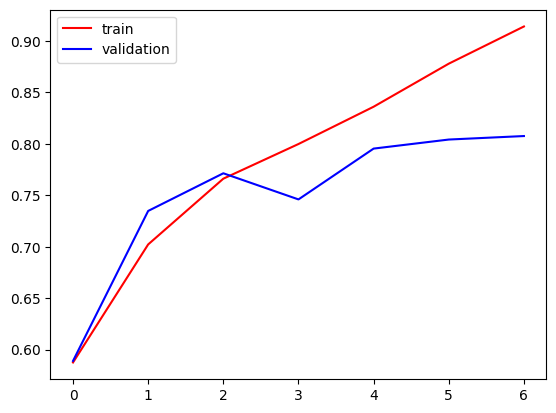

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

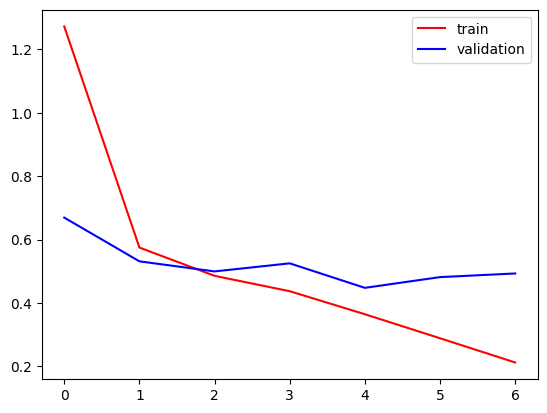

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
import cv2
test_img = cv2.imread('/content/dog image 1-unsplash (1).jpeg')

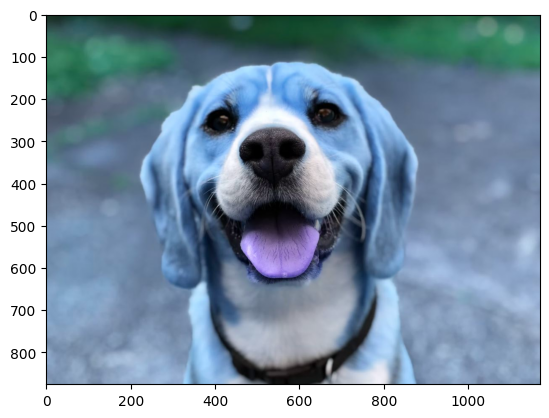

In [25]:
plt.imshow(test_img)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 1s 516ms/step


array([[0.]], dtype=float32)